In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
matches = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")
deliveries = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv")

In [4]:
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.info()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
matches.isnull().sum()
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

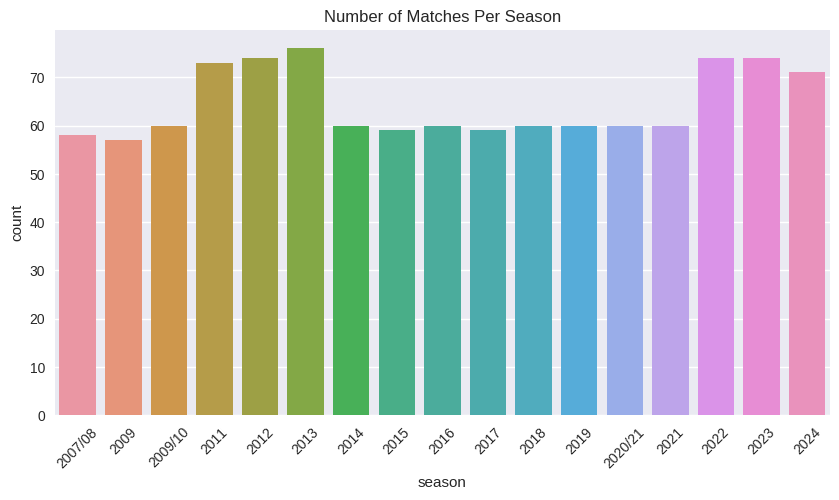

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="season", data=matches)
plt.xticks(rotation=45)
plt.title("Number of Matches Per Season")
plt.show()

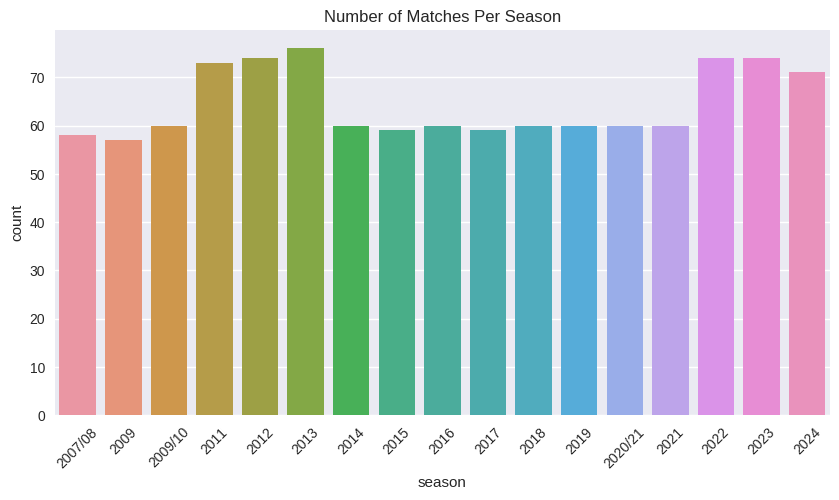

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x="season", data=matches)
plt.xticks(rotation=45)
plt.title("Number of Matches Per Season")
plt.show()

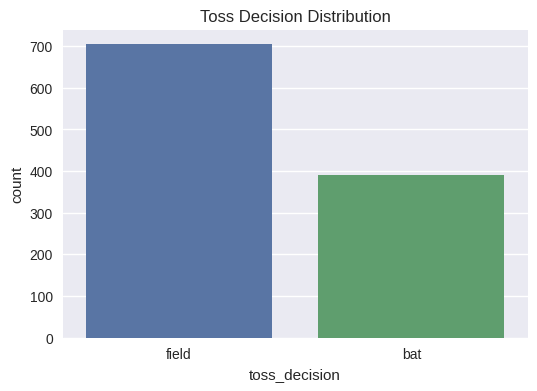

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="toss_decision", data=matches)
plt.title("Toss Decision Distribution")
plt.show()

In [10]:
toss_win_match_win = matches[matches["toss_winner"] == matches["winner"]]
print("Percentage of times toss winner also won match:",
      round(len(toss_win_match_win)/len(matches)*100, 2), "%")

Percentage of times toss winner also won match: 50.59 %


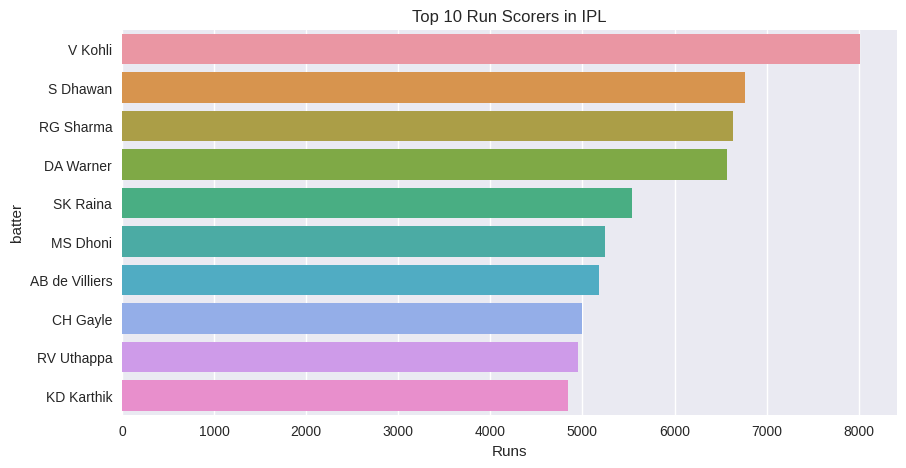

In [11]:
top_batsmen = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Runs")
plt.show()

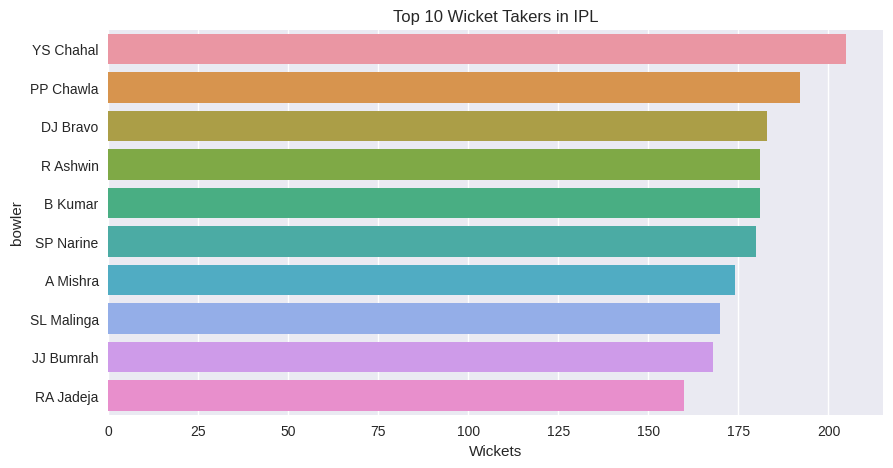

In [12]:
wickets = deliveries[
    (deliveries["dismissal_kind"].notnull()) &
    (deliveries["dismissal_kind"] != "run out")
]

top_bowlers = wickets["bowler"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Wickets")
plt.show()

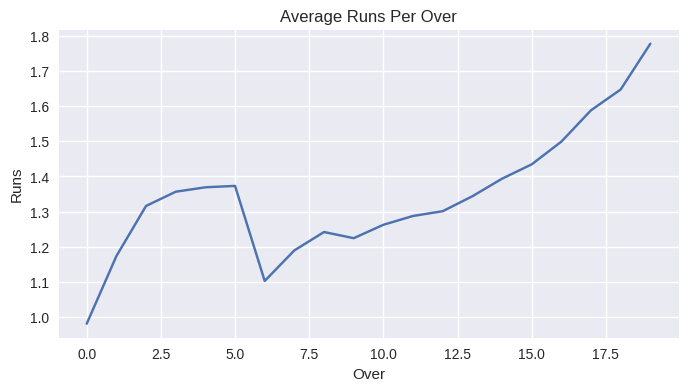

In [13]:
runs_per_over = deliveries.groupby("over")["total_runs"].mean()

plt.figure(figsize=(8,4))
runs_per_over.plot()
plt.title("Average Runs Per Over")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.show()

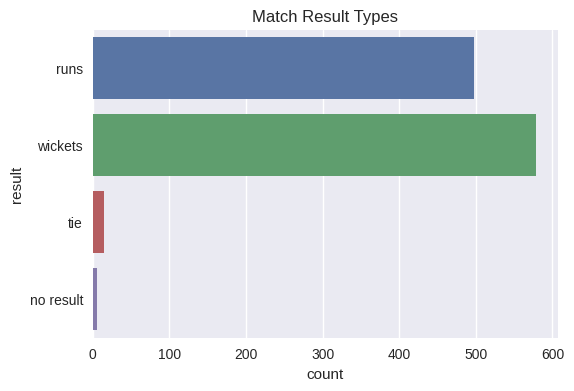

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(y="result", data=matches)
plt.title("Match Result Types")
plt.show()